# Image crawler example
In this Python notebook we implement an image crawler through selenium. 

1. Make screen shots using youtube image

2. Edit screen shots through the "pillow" package


mac:  pip3 install pillow

window: 

conda install -c anaconda pillow

conda uninstall pillow

conda install -c conda-forge pillow



In [23]:
from PIL import Image as pil
import time
from selenium import webdriver
driver = webdriver.Chrome('C:\chromedriver.exe')

### 1. Set url and define webdriver 

In [24]:
url = "https://www.youtube.com/watch?v=2S1sGZxj50Q&t=340s"

### 2. Take screen shots

https://chromedriver.chromium.org/downloads

Different chromedrivers may have to be downloaded depending on your laptop. 

In [25]:
driver.get(url)
time.sleep(1)
driver.save_screenshot("screenshot.png")

for idx in range(3):
    time.sleep(1)
    driver.save_screenshot("screenshot" + str(idx) + ".png")

Following image contains the entire browser. 

(1295, 843)


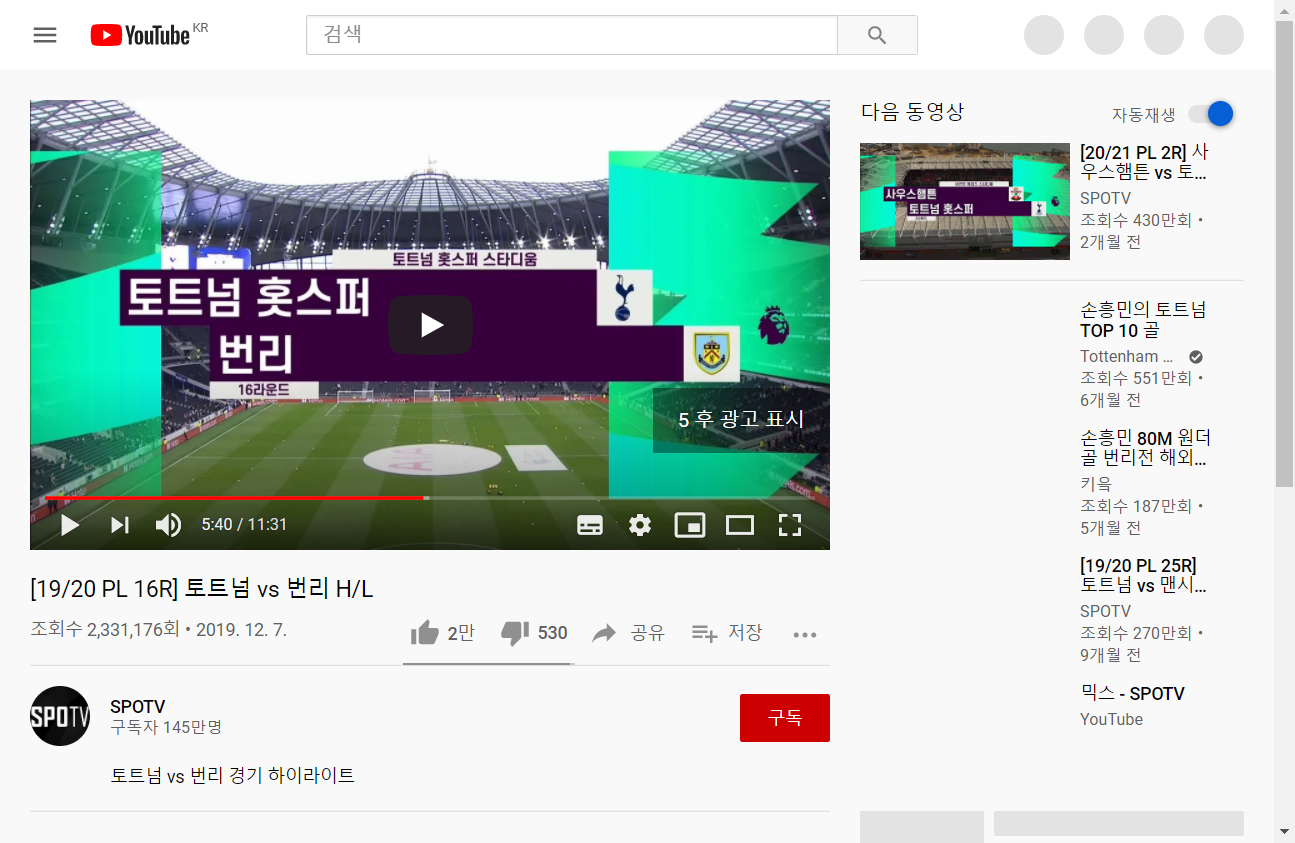

In [26]:
pil_im = pil.open("screenshot.png")
print(pil_im.size)
pil_im

### 3. Edit screen shots

get location for the video player 

In [27]:
element = driver.find_element_by_css_selector("#player-container")
location = element.location
size = element.size
location, size

({'x': 24, 'y': 80}, {'height': 360, 'width': 640})

Cut images: specify top, bottom, left, right

For retina display you need to multiply 2 

In [28]:
left = location["x"]*1
top = location ["y"]*1
right = left + size["width"]*1
bottom = top + size["height"]*1
area = (left, top, right, bottom)
area

(24, 80, 664, 440)

In [29]:
pil_im = pil_im.crop(area)
pil_im.save("screenshot_element.png")

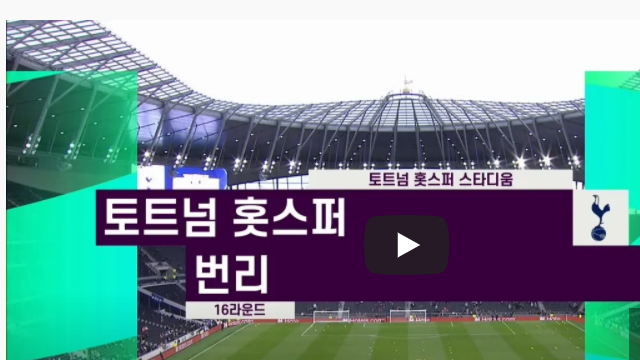

In [30]:
pil_im = pil.open("screenshot_element.png")
pil_im

In [31]:
element = driver.find_element_by_css_selector(".ytp-chrome-bottom")
playbar_height = element.size["height"]

In [32]:

left = location["x"] * 1
top = location ["y"] * 1
right = left + size["width"] * 1
bottom = top + size["height"] *1 - playbar_height *1
area = (left, top, right, bottom)
area

(24, 80, 664, 397)

In [33]:

pil_im = pil.open("screenshot.png")
pil_im = pil_im.crop(area)
pil_im.save("screenshot_element2.png")

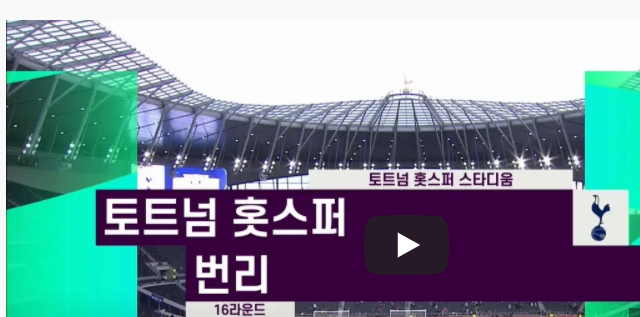

In [34]:
pil_im = pil.open("screenshot_element2.png")
pil_im

In [35]:
pil_im.size

(640, 317)

In [36]:
driver.quit()